In [88]:
# Data Set voorbereiden
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import pyodbc
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

DB = {"servername": "localhost\SQLEXPRESS",
      "database": "greatoutdoors"}

export_conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + DB['servername'] + 
                             ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

export_cursor = export_conn.cursor()


orders = pd.read_sql_query("SELECT * FROM orders;", export_conn)



product_quantities_yearly = orders.groupby(['order_year', 'order_month', 'order_detail_product_number', 'sales_branch_code','order_detail_unit_cost', 'order_detail_unit_sale_price',  'order_method_code'])['order_detail_quantity'].sum().reset_index()

product_quantities_yearly.columns = ['Order Year',  'order_month', 'Product Number', 'sales_branch_code', 'order_detail_unit_cost','order_detail_unit_sale_price', 'Order Method Code', 'Total Quantity Sold']

# pd.set_option('max_row', None)
pd.set_option('display.max_rows', 50)
product_quantities_yearly # Onze dataset!

# Afhankelijk - wat we willen voorspellen
# Onafhankelijk - op basis van wat we willen voorspellen



# X_train = Kolommen waarop je wilt trainen
# X_test = Kolommen zoals x train

# Y train = Resultaat die je wilt voorspellen
# Y_test = Resultaat zoals y train

X = product_quantities_yearly.drop('Total Quantity Sold', axis=1)
y = product_quantities_yearly.loc[:, ['Total Quantity Sold']]
# X
# y


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.15,
    random_state = 42
)

# y_test

In [90]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)

reg_model

LinearRegression()

In [91]:
y_pred = reg_model.predict(X_test)
y_pred

array([[60.75742543],
       [74.90783062],
       [ 4.15967212],
       ...,
       [64.32435073],
       [38.40100706],
       [47.83364632]])

In [92]:
prediction_df = pd.DataFrame(y_pred)

prediction_df = prediction_df.rename(columns = {0 : "Voorspelde Verkoopcijfers"})

prediction_df

,Voorspelde Verkoopcijfers
0,60.757425
1,74.907831
2,4.159672
3,62.991945
4,24.102772
...,...
6148,31.585722
6149,56.341999
6150,64.324351
6151,38.401007


In [93]:
y_test_prediction_merge = pd.concat([y_test.reset_index()['Total Quantity Sold'], prediction_df], axis = 1)
y_test_prediction_merge.loc[y_test_prediction_merge['Voorspelde Verkoopcijfers'].notna(), :]

,Total Quantity Sold,Voorspelde Verkoopcijfers
0,28,60.757425
1,138,74.907831
2,6,4.159672
3,34,62.991945
4,40,24.102772
...,...,...
6148,18,31.585722
6149,58,56.341999
6150,44,64.324351
6151,156,38.401007


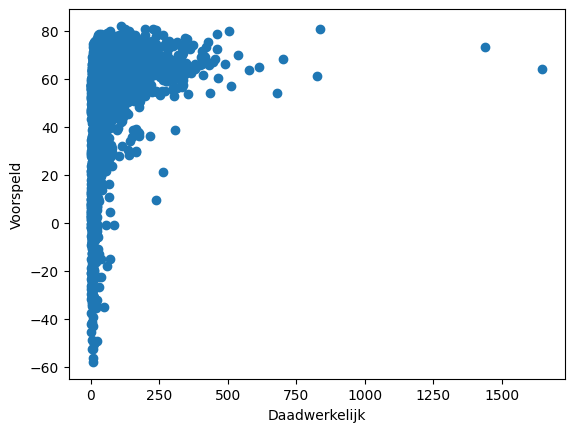

In [94]:
plt.scatter(y_test_prediction_merge['Total Quantity Sold'], y_test_prediction_merge['Voorspelde Verkoopcijfers'])

plt.xlabel('Daadwerkelijk')
plt.ylabel('Voorspeld')
plt.show()

In [95]:
mean_squared_error(y_test_prediction_merge['Total Quantity Sold'], y_test_prediction_merge['Voorspelde Verkoopcijfers'])


3984.0126022520885

In [96]:
mean_absolute_error(y_test_prediction_merge['Total Quantity Sold'], y_test_prediction_merge['Voorspelde Verkoopcijfers'])

35.63079808949841

In [97]:
mean_absolute_percentage_error(y_test_prediction_merge['Total Quantity Sold'], y_test_prediction_merge['Voorspelde Verkoopcijfers'])

1.4042148628364164